In [1]:
import sys
sys.path.insert(0, "../python")

from propagation import laser
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import integrate

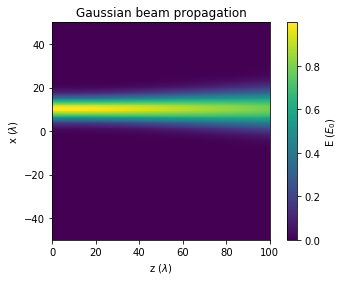

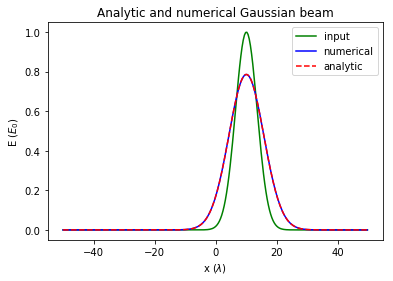

In [3]:
# The fft algorithm is significantly faster for powers of 2
Nx = 2**8
X = 100
x = np.linspace(-X/2, X/2, Nx, False)
Nz = 256
Z = 100
z = np.linspace(0, Z, Nz)

w0 = 5
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (Z/zR)**2)
E = np.exp(-(x-10)**2 / w0**2)
# Sqrt is because we are in 1D
EE = np.sqrt(w0 / wZ) * np.exp(-(x-10)**2 / wZ**2)

Ez = np.transpose(abs(laser.fourier_prop(E, x, z, 1)))

# Need to flip ud to put in the correct format for imshow
plt.imshow(np.flipud(Ez), extent=[0, Z, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('Gaussian beam propagation')
plt.show()

plt.plot(x, E, 'g-', x, Ez[:, Nz-1], 'b-', x, EE, 'r--')
plt.xlabel(r'x ($\lambda$)')
plt.ylabel(r'E ($E_0$)')
plt.title('Analytic and numerical Gaussian beam')
plt.legend(['input', 'numerical', 'analytic'])
plt.show()

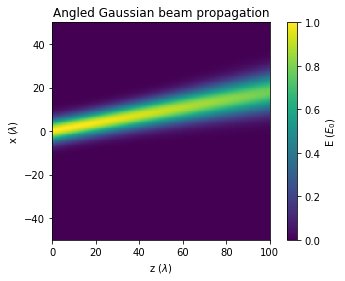

In [4]:
Nx = 2**8
X = 100
x = np.linspace(-X/2, X/2, Nx, False)
Nz = 256
Z = 100
z = np.linspace(0, Z, Nz)

theta = np.radians(10)
w0 = 5
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (x*np.sin(theta)/zR)**2)
wave = np.exp(1j*2*np.pi*x*np.sin(theta))
E = np.exp(-(x*np.cos(theta))**2 / w0**2) * wave

Ez = np.transpose(abs(laser.fourier_prop(E, x, z, 1)))

plt.imshow(np.flipud(Ez), extent=[0, Z, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('Angled Gaussian beam propagation')
plt.show()

In [5]:
Nx = 2**8
X = 100
x = np.linspace(-X/2, X/2, Nx, False)
Ny = 2**8
Y = 100
y = np.linspace(-Y/2, Y/2, Ny, False)

Nz = 256
Z = 100
z = np.linspace(0, Z, Nz)

w0 = 5
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (Z/zR)**2)
E = np.exp(-(np.reshape(x-10, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)
EE = (w0 / wZ) * np.exp(-(x-10)**2 / wZ**2)

Ez = abs(laser.fourier_prop2(E, x, y, z, 1))

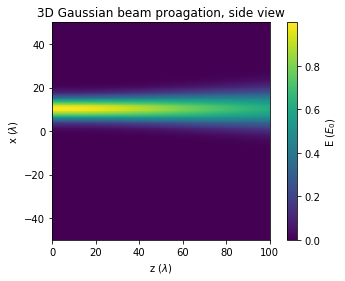

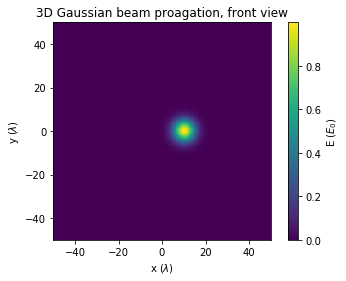

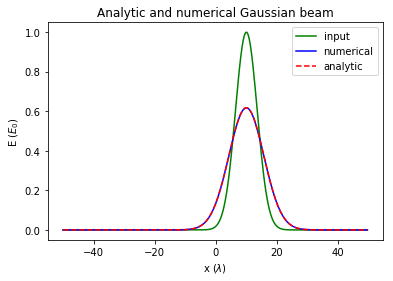

In [6]:
plt.imshow(np.flipud(np.transpose(Ez[:, :, int(Ny/2)])), extent=[0, Z, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('3D Gaussian beam proagation, side view')
plt.show()

plt.imshow(np.flipud(np.transpose(Ez[0, :, :])), extent=[-X/2, X/2, -Y/2, Y/2])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'x ($\lambda$)')
plt.ylabel(r'y ($\lambda$)')
plt.title('3D Gaussian beam proagation, front view')
plt.show()

plt.plot(x, E[:, int(Ny/2)], 'g-', x, Ez[Nz-1, :, int(Ny/2)], 'b-', x, EE, 'r--')
plt.xlabel(r'x ($\lambda$)')
plt.ylabel(r'E ($E_0$)')
plt.legend(['input', 'numerical', 'analytic'])
plt.title('Analytic and numerical Gaussian beam')
plt.show()

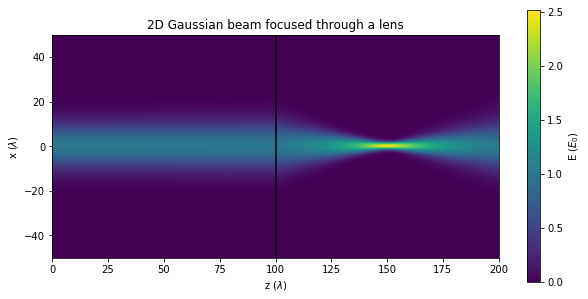

In [18]:
# Test of a lens real quick
Nx = 2**9
X = 100
x = np.linspace(-X/2, X/2, Nx, False)
Nz = 512
Z = 100
z = np.linspace(0, Z, Nz)

w0 = 10
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (Z/zR)**2)
E0 = np.exp(-x**2 / w0**2)

E1 = laser.fourier_prop(E0, x, z, 1)

f = 50.0
El = E1[Nz-1,:] * np.exp(-1j*np.pi*x**2/(f))
E2 = laser.fourier_prop(El, x, z, 1)

E = np.concatenate((E1, E2[1:, :]))

# Need to flip ud to put in the correct format for imshow
plt.figure(figsize=(10, 5))
plt.imshow(np.flipud(np.transpose(abs(E))), extent=[0, 2*Z, -X/2, X/2])
plt.plot([100, 100],[-50, 50],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('2D Gaussian beam focused through a lens')
plt.show()

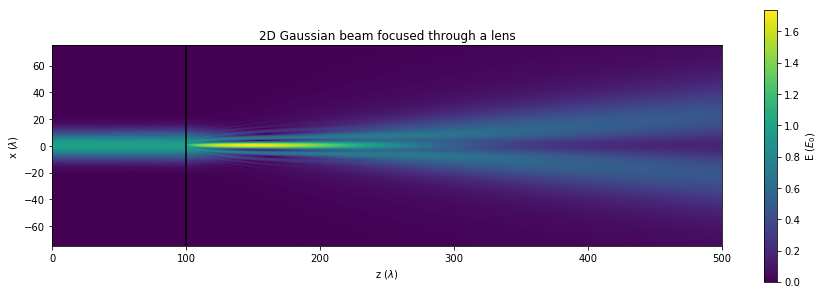

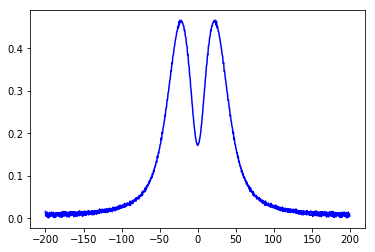

In [51]:
# Test of a axicon lens
Nx = 2**10
X = 400
x = np.linspace(-X/2, X/2, Nx, False)
Nz1 = 256
Z1 = 100
z1 = np.linspace(0, Z1, Nz1)

w0 = 10
zR = np.pi * w0**2
E0 = np.exp(-x**2 / w0**2)

E1 = laser.fourier_prop(E0, x, z1, 1)

Nz2 = 1024
Z2 = 400
z2 = np.linspace(0, Z2, Nz2)

alpha = np.radians(10)
El = E1[Nz1-1,:] * np.exp(-1j*np.pi*alpha*abs(x))
E2 = laser.fourier_prop(El, x, z2, 1)

E = np.concatenate((E1, E2[1:, :]))
Z = np.concatenate((z1, z2[1:]+z1[Nz1-1]))

# Need to flip ud to put in the correct format for imshow
plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(abs(E))), extent=[0, Z1+Z2, -X/2, X/2])
plt.plot([Z1, Z1],[-X/2, X/2],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('2D Gaussian beam focused through an axicon lens')
plt.xlim([0, Z1+Z2])
plt.ylim([-75, 75])
plt.show()

# Long distance
plt.plot(x, abs(E2[-1, :]), 'b-')
plt.show()

In [43]:
# Test of a axicon lens
Nx = 2**8
X = 400
x = np.linspace(-X/2, X/2, Nx, False)
Ny = 2**8
Y = 400
y = np.linspace(-Y/2, Y/2, Ny, False)
Nz1 = 64
Z1 = 100
z1 = np.linspace(0, Z1, Nz1)

w0 = 10
zR = np.pi * w0**2
E0 = np.exp(-(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)

E1 = laser.fourier_prop2(E0, x, y, z1, 1)

Nz2 = 256
Z2 = 400
z2 = np.linspace(0, Z2, Nz2)

alpha = np.radians(10)
El = E1[Nz1-1,:] * np.exp(-1j*np.pi*alpha*np.sqrt(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2))
E2 = laser.fourier_prop2(El, x, y, z2, 1)

E = np.concatenate((E1, E2[1:, :]))
Z = np.concatenate((z1, z2[1:]+z1[Nz1-1]))

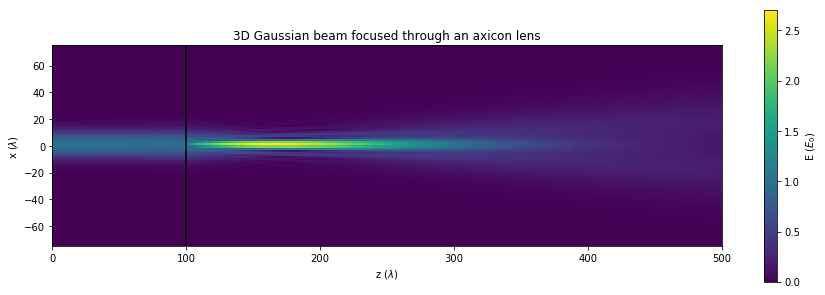

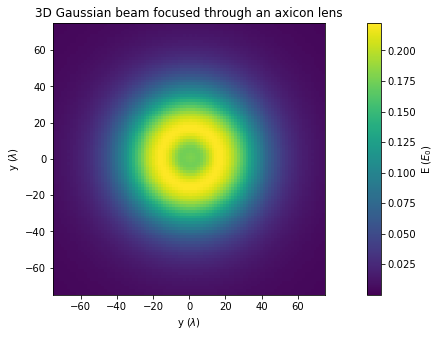

In [44]:
plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(abs(E[:, :, int(Ny/2)]))), extent=[0, Z1+Z2, -X/2, X/2])
plt.plot([Z1, Z1],[-X/2, X/2],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('3D Gaussian beam focused through an axicon lens')
plt.xlim([0, Z1+Z2])
plt.ylim([-75, 75])
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(np.flipud(np.transpose(abs(E[Nz1+Nz2-2, :, :]))), extent=[-X/2, X/2, -Y/2, Y/2])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'y ($\lambda$)')
plt.ylabel(r'y ($\lambda$)')
plt.title('3D Gaussian beam focused through an axicon lens')
plt.xlim([-75, 75])
plt.ylim([-75, 75])
plt.show()

In [38]:
# Test of a axicon lens
Nx = 2**11
X = 1000
x = np.linspace(-X/2, X/2, Nx, False)
Ny = 2**11
Y = 1000
y = np.linspace(-Y/2, Y/2, Ny, False)

w0 = 20
zR = np.pi * w0**2
E0 = np.exp(-(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)

z = [500, 1000, 2500]

alpha = np.radians(10)
El = E0 * np.exp(-1j*np.pi*alpha*np.sqrt(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2))
E = laser.fourier_prop2(El, x, y, z, 1)

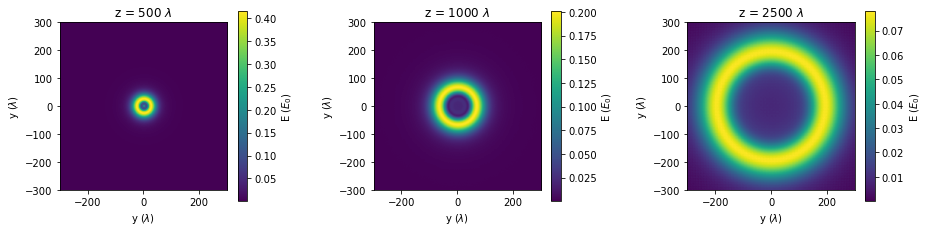

In [39]:
plt.figure(figsize=(15, 3.5))
plt.subplots_adjust(hspace=.25, wspace=0.5)

plt.subplot(131)
plt.imshow(np.flipud(np.transpose(abs(E[0, :, :]))), extent=[-X/2, X/2, -Y/2, Y/2])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'y ($\lambda$)')
plt.ylabel(r'y ($\lambda$)')
plt.title(r'z = 500 $\lambda$')
plt.xlim([-300, 300])
plt.ylim([-300, 300])

plt.subplot(132)
plt.imshow(np.flipud(np.transpose(abs(E[1, :, :]))), extent=[-X/2, X/2, -Y/2, Y/2])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'y ($\lambda$)')
plt.ylabel(r'y ($\lambda$)')
plt.title(r'z = 1000 $\lambda$')
plt.xlim([-300, 300])
plt.ylim([-300, 300])

plt.subplot(133)
plt.imshow(np.flipud(np.transpose(abs(E[2, :, :]))), extent=[-X/2, X/2, -Y/2, Y/2])
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'y ($\lambda$)')
plt.ylabel(r'y ($\lambda$)')
plt.title(r'z = 2500 $\lambda$')
plt.xlim([-300, 300])
plt.ylim([-300, 300])
plt.show()

In [2]:
# Test of a axicon lens
Nx = 2**8
X = 300
x = np.linspace(-X/2, X/2, Nx, False)
Nz1 = 64
Z1 = 1000
z1 = np.linspace(0, Z1, Nz1)

n0 = 1.5834
w0 = 50
zR = np.pi * w0**2
E0 = np.exp(-x**2 / w0**2)

E1 = laser.fourier_prop(E0, x, z1, 1, n0)

Nz2 = 256
Z2 = 4000
z2 = np.linspace(0, Z2, Nz2)

k = 1.5421*10**-7
nih = np.repeat(np.reshape(-n0*(k/2)*x**2, (Nx, 1)), Nz2, axis=1)
E2 = laser.beam_prop(E1[Nz1-1,:], nih, x, z2, 1, n0)

Nz3 = 64
Z3 = 1000
z3 = np.linspace(0, Z3, Nz3)

E3 = laser.fourier_prop(E2[Nz2-1,:], x, z3, 1, n0)
#print(E2[Nz2-1,:])

E = np.concatenate((E1, E2[1:, :], E3[1:, :]))
Z = np.concatenate((z1, z2[1:]+z1[Nz1-1], z3[1:]+z1[Nz1-1]+z2[Nz2-1]))

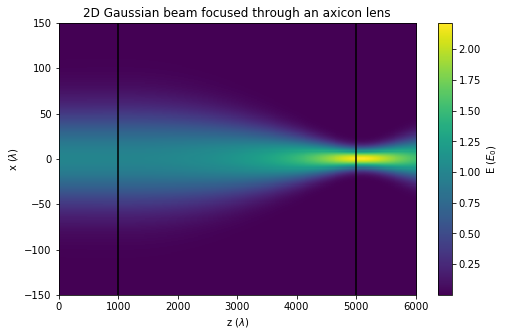

In [4]:
# Need to flip ud to put in the correct format for imshow
plt.figure(figsize=(8, 5))
plt.imshow(np.flipud(np.transpose(abs(E))), aspect='auto', extent=[0, Z1+Z2+Z3, -X/2, X/2])
plt.plot([Z1, Z1],[-X/2, X/2],'k-')
plt.plot([Z1+Z2, Z1+Z2],[-X/2, X/2],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('2D Gaussian beam focused through an axicon lens')
plt.xlim([0, Z1+Z2+Z3])
plt.ylim([-150, 150])
plt.show()